# Cobra example

This notebook give an example of use of the run_cobra function on the experimental dataset iML1515_EXP_UB. For every row the fluxes given to cobra are zero except the one in the X of the dataset. We also use a constant on to multiply the constraints in attempt to optimize the prediction.

In [5]:
import cobra
from amn.model import AMNWtModel

data_dir = "../data"


dataset_file_experimental = "/Dataset/iML1515_EXP_UB.npz"
cobra_model = cobra.io.read_sbml_model(data_dir + "/Dataset/iML1515_EXP_UB.xml")
objective = ["BIOMASS_Ec_iML1515_core_75p37M"]

constraint_cst = 2.5

# Get some dataset from a model object.
model_experimental = AMNWtModel(dataset_file=data_dir + dataset_file_experimental, 
                   objective=objective,
                   timestep=4,
                   hidden_dim=50,
                   verbose=True,
                   )

# Non-nul input for the metabolic model.
V_in = model_experimental.X * constraint_cst

number of metabolites:  1080
filtered measurements size:  1


In [6]:
from amn.run_cobra import run_cobra

# Result for the cobra model on every entry of the dataset.
Y_pred = []

for i in range(V_in.shape[0]):
    # Initialize all the reaction to 0.
    inf = {r.id: 0 for r in cobra_model.reactions}
    # Add all the non-nul inputs for the entry i.
    for j in range(V_in.shape[1]):
        inf[model_experimental.medium[j]] = float(V_in[i,j])
    result = run_cobra(cobra_model,objective , inf, method='pFBA')

    Y_pred.append(result[1])


/home/agiralt/anaconda3/envs/amn/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


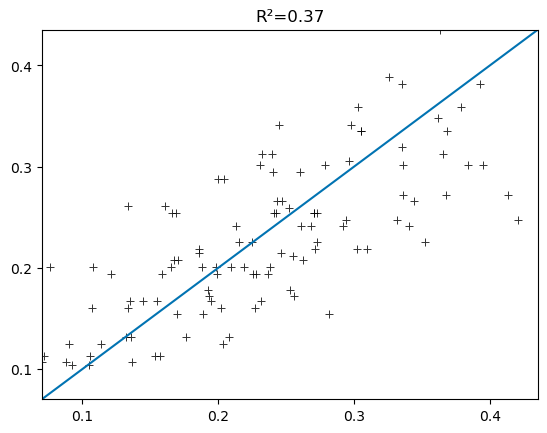

In [3]:
from sklearn.metrics import r2_score
from amn.tools import plot_regression

plot_regression(Y_pred, model_experimental.Y, "", "",
                "R²="+str(round(r2_score(Y_pred, model_experimental.Y), 2)))